### Assignment 1 on Intensity Transformations and Neighborhood Filtering

#### Q1

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

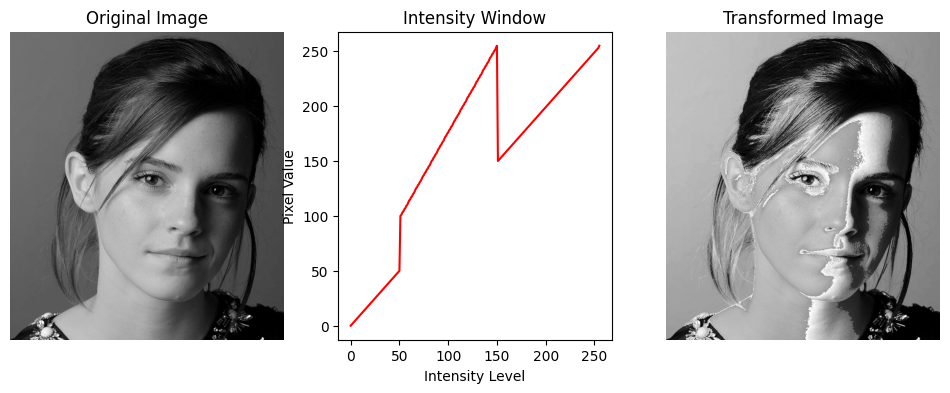

In [8]:
emma = cv.imread(r'D:\Academics\EN3160 - Image Processing and Machine Vision\images\emma.jpg', cv.IMREAD_GRAYSCALE)

assert emma is not None

t1 = np.linspace(0,50,51, dtype=np.uint8)
t2 = np.linspace(100,255,150-50, dtype=np.uint8)
t3  = np.linspace(150,255, 255-150, dtype=np.uint8)

intensity_window = np.concatenate((t1,t2,t3), axis=0)
transformed_emma = cv.LUT(emma, intensity_window)

fig,ax = plt.subplots(1,3,figsize=(12,4))

ax[0].imshow(emma, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].plot(intensity_window, 'r')
ax[1].set_title('Intensity Window')
ax[1].set_xlabel('Intensity Level')
ax[1].set_ylabel('Pixel Value')

ax[2].imshow(transformed_emma, cmap='gray')
ax[2].set_title('Transformed Image')
ax[2].axis('off')

plt.show()


#### Q2.

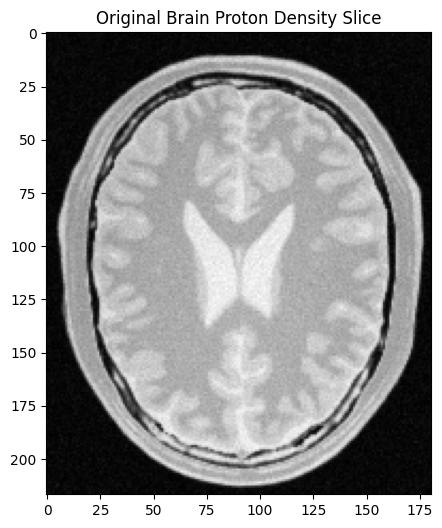

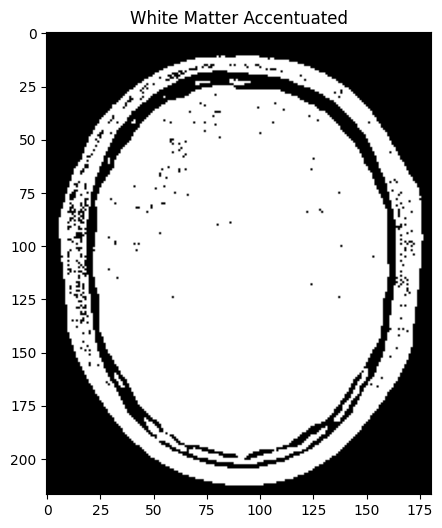

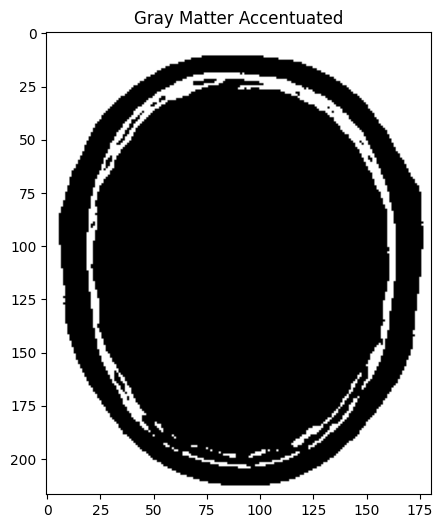

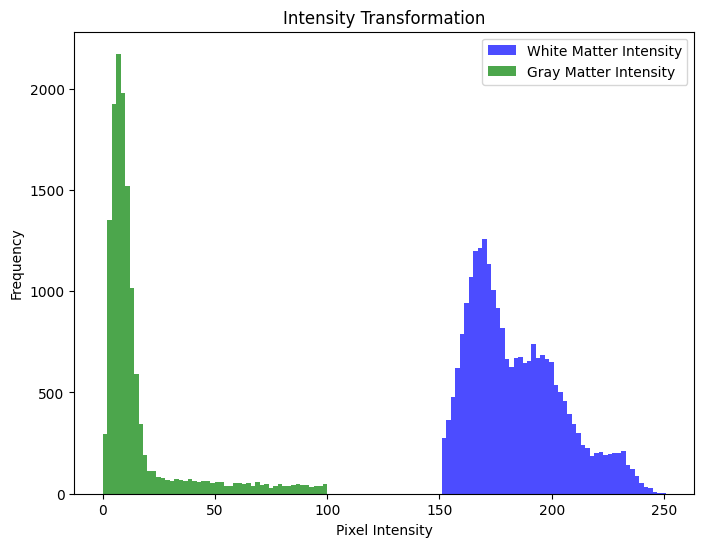

In [26]:
import cv2

# Load the image in grayscale
image_path = r"a1images\brain_proton_density_slice.png"  # Update the path accordingly
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Original Brain Proton Density Slice")
plt.show()

# Apply intensity transformation to accentuate white matter (bright regions)
_, white_matter = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)

# Apply intensity transformation to accentuate gray matter (darker regions)
_, gray_matter = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY_INV)

# Display the white matter
plt.figure(figsize=(6, 6))
plt.imshow(white_matter, cmap='gray')
plt.title("White Matter Accentuated")
plt.show()

# Display the gray matter
plt.figure(figsize=(6, 6))
plt.imshow(gray_matter, cmap='gray')
plt.title("Gray Matter Accentuated")
plt.show()

# Plotting intensity transformation curves
white_matter_intensity = image[white_matter == 255].flatten()
gray_matter_intensity = image[gray_matter == 255].flatten()

plt.figure(figsize=(8, 6))
plt.hist(white_matter_intensity, bins=50, color='blue', alpha=0.7, label='White Matter Intensity')
plt.hist(gray_matter_intensity, bins=50, color='green', alpha=0.7, label='Gray Matter Intensity')
plt.title('Intensity Transformation')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()
